# DESCRIPTION

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

Problem Statement:  

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

Domain: Social Media

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

Content: 

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

Tasks: 

Load the tweets file using read_csv function from Pandas package. 

Get the tweets into a list for easy text cleanup and manipulation.

To cleanup: 

Normalize the casing.

Using regular expressions, remove user handles. These begin with '@’.

Using regular expressions, remove URLs.

Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

Remove stop words.

Remove redundant terms like ‘amp’, ‘rt’, etc.

Remove ‘#’ symbols from the tweet while retaining the term.

Extra cleanup by removing terms with a length of 1.

Check out the top terms in the tweets:

First, get all the tokenized terms into one large list.

Use the counter and find the 10 most common terms.

Data formatting for predictive modeling:

Join the tokens back to form strings. This will be required for the vectorizers.

Assign x and y.

Perform train_test_split using sklearn.

We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

Import TF-IDF  vectorizer from sklearn.

Instantiate with a maximum of 5000 terms in your vocabulary.

Fit and apply on the train set.

Apply on the test set.

Model building: Ordinary Logistic Regression

Instantiate Logistic Regression from sklearn with default parameters.

Fit into  the train data.

Make predictions for the train and the test set.

Model evaluation: Accuracy, recall, and f_1 score.

Report the accuracy on the train set.

Report the recall on the train set: decent, high, or low.

Get the f1 score on the train set.

Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

Adjust the appropriate class in the LogisticRegression model.

Train again with the adjustment and evaluate.

Train the model on the train set.

Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

Regularization and Hyperparameter tuning:

Import GridSearch and StratifiedKFold because of class imbalance.

Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

Use a balanced class weight while instantiating the logistic regression.

Find the parameters with the best recall in cross validation.

Choose ‘recall’ as the metric for scoring.

Choose stratified 4 fold cross validation scheme.

Fit into  the train set.

What are the best parameters?

Predict and evaluate using the best estimator.

Use the best estimator from the grid search to make predictions on the test set.

What is the recall on the test set for the toxic comments?

What is the f_1 score?

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nlp basics
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import re
stop_words=stopwords.words('english')

from collections import Counter
import enchant

#import sklearn 
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
twitter_hate=pd.read_csv('TwitterHate.csv')

In [5]:
twitter_hate.head(30)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
twitter_hate.shape

(31962, 3)

In [7]:
twitter_hate.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
twitter_hate.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

## Experiments with a single sample text

In [9]:
sample_tweet=twitter_hate.tweet.iloc[0:1][0]
sample_tweet

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [10]:
tokens=[word.lower() for word in word_tokenize(sample_tweet)  if word not in stop_words and len(list(re.findall('[a-z]',word)))!=0]
tokens

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run']

In [11]:
#len(list(re.findall('[a-z]','1233a1a')))!=0

In [17]:
pattern='https://\S{0,}|http://\S{0,}'
#re.sub(pattern,'',' https://meeqdddddddd  qff http://fw.gmail.com  ')

In [18]:
fil_tokens=[re.sub(pattern,'',word) for word in tokens]
fil_tokens

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run']

In [19]:
fil_tokens_1=[re.sub('#','',word) for word in fil_tokens]
fil_tokens_1

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run']

In [20]:
fil_tokens_2=[word for word in fil_tokens_1 if len(word)>1]
fil_tokens_2

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run']

## Viewing all text

In [21]:
for i in twitter_hate.tweet[:100]:
    print(i)

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
  bihday your majesty
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
 factsguide: society now    #motivation
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
 @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl
we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦ 
 @user @user welcome here !  i'm   it's so #gr8 ! 
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
we are so selfish. #orlando #standwith

In [22]:
def transform_1(df,tweet_col_name):
    tweet_lis=[]
    display=[]
    for tweet in df[tweet_col_name]:
        tokens=[word.lower() for word in word_tokenize(tweet)  if word not in stop_words and len(list(re.findall('[a-z]',word)))!=0]
        fil_tokens=[re.sub(pattern,'',word) for word in tokens]
        fil_tokens_1=[re.sub('#','',word) for word in fil_tokens]
        fil_tokens_2=[word for word in fil_tokens_1 if len(word)>1]
        tweet_lis.append(fil_tokens_2)
        display=[tokens,fil_tokens,fil_tokens_1,fil_tokens_2]
    return tweet_lis,display

In [85]:
tweet_lis,display=transform_1(twitter_hate,'tweet')

In [86]:
all_words=[]
for lis in tweet_lis:
    for word in lis:
        all_words.append(word)

In [96]:
Counter(all_words).most_common(len(all_words))

[('user', 17577),
 ("'s", 3219),
 ('love', 2739),
 ('day', 2258),
 ("n't", 2228),
 ('amp', 1776),
 ('happy', 1653),
 ('time', 1127),
 ('life', 1122),
 ('today', 1067),
 ('like', 1048),
 ("'m", 1020),
 ('new', 990),
 ('thankful', 946),
 ('positive', 931),
 ('get', 920),
 ('people', 872),
 ('good', 858),
 ('bihday', 841),
 ('one', 789),
 ('see', 760),
 ('ca', 759),
 ('smile', 711),
 ('go', 657),
 ('want', 647),
 ('take', 621),
 ('father', 618),
 ('work', 604),
 ('healthy', 603),
 ('weekend', 595),
 ('fun', 586),
 ('got', 581),
 ("'re", 565),
 ('summer', 559),
 ('make', 547),
 ('family', 526),
 ('friday', 521),
 ('us', 521),
 ('beautiful', 513),
 ('best', 512),
 ('great', 510),
 ('need', 507),
 ('way', 507),
 ('bull', 504),
 ('friends', 501),
 ('going', 490),
 ('days', 485),
 ('first', 480),
 ('really', 475),
 ('wait', 463),
 ('music', 458),
 ('morning', 450),
 ('world', 444),
 ('back', 441),
 ('tomorrow', 434),
 ('know', 431),
 ('week', 424),
 ('sad', 419),
 ('cute', 418),
 ('orlando', 4

In [115]:
most_common_10000=Counter(all_words).most_common(10000)

In [99]:
most_common_50

[('user', 17577),
 ("'s", 3219),
 ('love', 2739),
 ('day', 2258),
 ("n't", 2228),
 ('amp', 1776),
 ('happy', 1653),
 ('time', 1127),
 ('life', 1122),
 ('today', 1067),
 ('like', 1048),
 ("'m", 1020),
 ('new', 990),
 ('thankful', 946),
 ('positive', 931),
 ('get', 920),
 ('people', 872),
 ('good', 858),
 ('bihday', 841),
 ('one', 789),
 ('see', 760),
 ('ca', 759),
 ('smile', 711),
 ('go', 657),
 ('want', 647),
 ('take', 621),
 ('father', 618),
 ('work', 604),
 ('healthy', 603),
 ('weekend', 595),
 ('fun', 586),
 ('got', 581),
 ("'re", 565),
 ('summer', 559),
 ('make', 547),
 ('family', 526),
 ('friday', 521),
 ('us', 521),
 ('beautiful', 513),
 ('best', 512),
 ('great', 510),
 ('need', 507),
 ('way', 507),
 ('bull', 504),
 ('friends', 501),
 ('going', 490),
 ('days', 485),
 ('first', 480),
 ('really', 475),
 ('wait', 463),
 ('music', 458),
 ('morning', 450),
 ('world', 444),
 ('back', 441),
 ('tomorrow', 434),
 ('know', 431),
 ('week', 424),
 ('sad', 419),
 ('cute', 418),
 ('orlando', 4

In [ ]:
most_common_50=Counter(all_words).most_commonost_common_50(50)

In [26]:
d=enchant.Dict('en_US')

In [27]:
for i in most_common_50:
    if ~d.check(i[0]):
        print(i)

('user', 546)
("'s", 99)
('love', 96)
('day', 59)
("n't", 58)
('amp', 53)
('happy', 52)
('thankful', 39)
('people', 38)
('get', 34)
('good', 33)
('positive', 32)
('time', 31)
("'m", 30)
('like', 30)
('life', 30)
('bihday', 27)
('today', 26)
('new', 26)
('take', 25)
('father', 23)
('one', 23)
('family', 21)
('know', 20)
('weekend', 20)
('right', 20)
('see', 19)
('want', 19)
('healthy', 19)
('go', 19)
('back', 19)
('orlando', 18)
('beautiful', 18)
('work', 18)
('blog', 17)
('silver', 17)
('gold', 17)
('home', 17)
('friends', 17)
('model', 16)
('sunday', 16)
('great', 16)
('bull', 16)
('music', 16)
('way', 16)
('smile', 16)
('days', 16)
('forex', 15)
('never', 15)
("'ve", 15)


In [302]:
sample_df_lis=[]
for i in tweet_lis[:100]:
    sample_df_lis.append(' '.join(i))

sample_df_lis

['user father dysfunctional selfish drags kids dysfunction run',
 "user user thanks lyft credit ca n't use cause n't offer wheelchair vans pdx disapointed getthanked",
 'bihday majesty',
 'model love take time urð\x9f\x93±',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'user camping tomorrow user user user user user user user dannyâ\x80¦',
 "next school year year exams.ð\x9f\x98¯ ca n't think school exams hate imagine actorslife revolutionschool girl",
 'love land allin cavs champions cleveland clevelandcavaliers',
 "user user welcome 'm 's gr8",
 'ireland consumer price index mom climbed previous may blog silver gold forex',
 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love',
 'get see daddy today 80days gettingfed',
 "user cnn calls michigan middle school 'build wall chant tcot",
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedol

## Words that are common but dont mean anything are :

In [28]:
rem_words=["'s","amp","'m","'re","ca"]

In [29]:
#[word for word in  if word in rem_words]

## Transform on whole dataframe

In [30]:
def transform(df,tweet_col_name,rem_words):
    tweet_lis=[]
    display=[]
    for tweet in df[tweet_col_name]:
        tokens=[word.lower() for word in word_tokenize(tweet)  if word not in stop_words and len(list(re.findall('[a-z]',word)))!=0]
        fil_tokens=[re.sub(pattern,'',word) for word in tokens]
        fil_tokens_1=[re.sub('#','',word) for word in fil_tokens]
        fil_tokens_2=[word for word in fil_tokens_1 if len(word)>1]
        fil_tokens_3=[word for word in fil_tokens_2 if word not in rem_words]
        tweet_lis.append(fil_tokens_3)
    return tweet_lis

In [31]:
tweet_lis=transform(twitter_hate,'tweet',rem_words)

## detokenizing

In [32]:
twitter_text_input=[]
for i in tweet_lis:
    twitter_text_input.append(' '.join(i))
    
len(twitter_text_input)

31962

In [38]:
Y=twitter_hate.label
X=twitter_text_input

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

## tf-idf vectorizer

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf=TfidfVectorizer(stop_words='english',max_features=5000,smooth_idf=True)

In [44]:
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [45]:
print(f'Train shape:{X_train.shape}')
print(f'Test shape:{X_test.shape}')

Train shape:(23971, 5000)
Test shape:(7991, 5000)


In [46]:
#from sklearn.decomposition import TruncatedSVD
#svd=TruncatedSVD(n_components=100,n_iter=100,random_state=122)
#X_svd=svd.fit_transform(X)
#print('Number of components = ', len(svd.components_))
#print('Shape of components matrix =', svd.components_.shape)

In [123]:
def transform_most_common(df,tweet_col_name,rem_words,most_common):
    tweet_lis=[]
    display=[]
    for tweet in df[tweet_col_name]:
        tokens=[word.lower() for word in word_tokenize(tweet)  if word not in stop_words and len(list(re.findall('[a-z]',word)))!=0]
        fil_tokens=[re.sub(pattern,'',word) for word in tokens]
        fil_tokens_1=[re.sub('#','',word) for word in fil_tokens]
        fil_tokens_2=[word for word in fil_tokens_1 if len(word)>1]
        fil_tokens_3=[word for word in fil_tokens_2 if word not in rem_words]
        fil_tokens_4=[word for word in fil_tokens_3 if word in most_common]
        if len(fil_tokens_4)==0:
            tweet_lis.append(fil_tokens_3)
        else:
            tweet_lis.append(fil_tokens_4)
    return tweet_lis

In [124]:
tweet_lis_short=transform_most_common(twitter_hate,'tweet',rem_words,most_common_10000)

In [125]:
len(tweet_lis[0])-len(tweet_lis_short[0])

0

In [126]:
twitter_text_input_short=[]
for i in tweet_lis_short:
    twitter_text_input_short.append(' '.join(i))
    
len(twitter_text_input_short)

Y=twitter_hate.label
X_short=twitter_text_input_short

X_train_short,X_test_short,y_train_short,y_test_short=train_test_split(X_short,Y,test_size=0.25)

In [127]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [128]:
nb=GaussianNB()

In [52]:
nb.fit(X_train.toarray(),y_train)

GaussianNB()

In [54]:
y_pred_test=nb.predict(X_test.toarray())
y_pred_train=nb.predict(X_train.toarray())

In [55]:
print(f'Train accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Test accuracy: {accuracy_score(y_test,y_pred_test)}')

Train accuracy: 0.8419757206624672
Test accuracy: 0.7951445376048054


In [129]:
X_train_short=tfidf.fit_transform(X_train_short)
X_test_short=tfidf.transform(X_test_short)
nb.fit(X_train_short.toarray(),y_train)
y_pred_test_short=nb.predict(X_test_short.toarray())
y_pred_train_short=nb.predict(X_train_short.toarray())
print(f'Train accuracy: {accuracy_score(y_train_short,y_pred_train_short)}')
print(f'Test accuracy: {accuracy_score(y_test_short,y_pred_test_short)}')

Train accuracy: 0.47766050644528807
Test accuracy: 0.4731573019647103


# Thus, if we use most common 10000 words, our accuracy drops tremendously

Text(0.5, 15.0, 'Predictions')

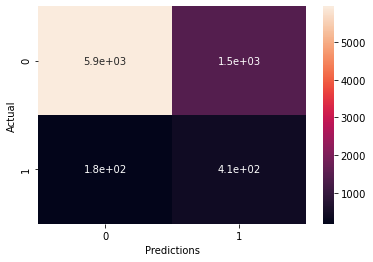

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)
plt.ylabel('Actual')
plt.xlabel('Predictions')

In [78]:
confusion_matrix(y_test,y_pred_test)

array([[5946, 1459],
       [ 178,  408]], dtype=int64)

In [79]:
TN=confusion_matrix(y_test,y_pred_test)[0][0]
TP=confusion_matrix(y_test,y_pred_test)[1][1]
FN=confusion_matrix(y_test,y_pred_test)[1][0]
FP=confusion_matrix(y_test,y_pred_test)[0][1]

In [80]:
specificity=(TN)/(TN+FP)
sensitivity=(TP)/(TP+FN)
error=(FN+FP)/(TP+TN+FP+FN)
print('Test:')
print(f'Specificity:{specificity}')
print(f'Sensitivity:{sensitivity}')
print(f'Error:{error}')

Test:
Specificity:0.8029709655638082
Sensitivity:0.6962457337883959
Error:0.2048554623951946


In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
X_train_lda=lda.fit_transform(X_train.toarray(),y_train)
X_test_lda=lda.transform(X_test.toarray())

In [67]:
nb.fit(X_train_lda,y_train)

GaussianNB()

In [70]:
y_pred_test_lda=nb.predict(X_test_lda)
y_pred_train_lda=nb.predict(X_train_lda)

In [71]:
print(f'Train accuracy: {accuracy_score(y_train,y_pred_train_lda)}')
print(f'Test accuracy: {accuracy_score(y_test,y_pred_test_lda)}')

Train accuracy: 0.9736765258020108
Test accuracy: 0.9443123513953198


array([[7148,  257],
       [ 188,  398]], dtype=int64)

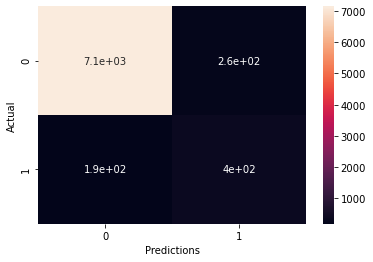

In [75]:
sns.heatmap(confusion_matrix(y_test,y_pred_test_lda),annot=True)
plt.ylabel('Actual')
plt.xlabel('Predictions')
confusion_matrix(y_test,y_pred_test_lda)

In [83]:
TN=confusion_matrix(y_test,y_pred_test_lda)[0][0]
TP=confusion_matrix(y_test,y_pred_test_lda)[1][1]
FN=confusion_matrix(y_test,y_pred_test_lda)[1][0]
FP=confusion_matrix(y_test,y_pred_test_lda)[0][1]

In [84]:
specificity=(TN)/(TN+FP)
sensitivity=(TP)/(TP+FN)
error=(FN+FP)/(TP+TN+FP+FN)
print('Test:')
print(f'Specificity:{specificity}')
print(f'Sensitivity:{sensitivity}')
print(f'Error:{error}')

Test:
Specificity:0.9652937204591492
Sensitivity:0.6791808873720137
Error:0.055687648604680264


# Thus using LDA increased Specificity, decreased Sensitivity and error